Required libraries

In [358]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

Import dataset

In [359]:
df = pd.read_csv('data.csv')

Copy the dataset and show the shape

In [360]:
dfc = df.copy()
dfc.shape

(311, 14)

Get the first 10 rows

In [361]:
dfc.head(10)

,name,brand,model,memory,memory_interface,length,interface,chipset,base_clock,clock_speed,frame_sync,price,item_url,used
0,MSI Gaming GeForce RTX 3090 24GB GDRR6X 384-Bi...,MSI,RTX 3090 GAMING X TRIO 24G,24 GB,GDRR6X,335 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1785 MHz,G-Sync,"$1,289.99",https://pcbuilder.net/component-details/graphi...,0
1,"EVGA GeForce RTX 3090 FTW3 Ultra Gaming, 24GB ...",EVGA,RTX 3090 FTW3 Ultra,24 GB,GDDR6X,300 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1800 MHz,G-Sync,"$1,199.99",https://pcbuilder.net/component-details/graphi...,0
2,ASUS ROG Strix NVIDIA GeForce RTX 3090 White O...,ASUS,ROG Strix RTX 3090 OC Edition,24 GB,GDDR6X,318.5 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1890 MHz,G-Sync,"$1,794.99",https://pcbuilder.net/component-details/graphi...,0
3,MSI Gaming GeForce RTX 3090 24GB GDRR6X 384-Bi...,MSI,RTX 3090 SUPRIM X 24G,24 GB,GDDR6X,336 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1875 MHz,G-Sync,"$2,017.21",https://pcbuilder.net/component-details/graphi...,0
4,GIGABYTE AORUS GeForce RTX 3090 Xtreme 24G Gra...,Gigabyte,AORUS RTX 3090 Xtreme 24G,24 GB,GDDR6X,319 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1860 MHz,G-Sync,"$3,399.99",https://pcbuilder.net/component-details/graphi...,0
5,ASUS TUF Gaming NVIDIA GeForce RTX 3090 OC Edi...,ASUS,TUF Gaming RTX 3090 OC Edition,24 GB,GDDR6X,299.9 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1770 MHz,G-Sync,"$1,249",https://pcbuilder.net/component-details/graphi...,0
6,GIGABYTE AORUS GeForce RTX 3090 Xtreme WATERFO...,Gigabyte,AORUS RTX 3090 Xtreme Waterforce 24G,24 GB,GDDR6X,252 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1785 MHz,G-Sync,"$6,800",https://pcbuilder.net/component-details/graphi...,0
7,EVGA 24G-P5-3975-KR GeForce RTX 3090 XC3 Ultra...,EVGA,RTX 3090 XC3 Ultra,24 GB,GDDR6X,285 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1725 MHz,G-Sync,"$1,299",https://pcbuilder.net/component-details/graphi...,0
8,Gigabyte GeForce RTX 3090 GAMING OC 24G Graphi...,Gigabyte,RTX 3090 Gaming OC 24G,24 GB,GDDR6X,320 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1755 MHz,G-Sync,"$1,299",https://pcbuilder.net/component-details/graphi...,0
9,MSI Gaming GeForce RTX 3090 24GB GDRR6X 384-Bi...,MSI,RTX 3090 VENTUS 3X 24G OC,24 GB,GDDR6X,305 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1725 MHz,G-Sync,"$1,269.90",https://pcbuilder.net/component-details/graphi...,0


Get the columns

In [362]:
dfc.columns

Index(['name', 'brand', 'model', 'memory', 'memory_interface', 'length',
       'interface', 'chipset', 'base_clock', 'clock_speed', 'frame_sync',
       'price', 'item_url', 'used'],
      dtype='object')

Get the dataset information

In [363]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              311 non-null    object
 1   brand             311 non-null    object
 2   model             311 non-null    object
 3   memory            311 non-null    object
 4   memory_interface  311 non-null    object
 5   length            311 non-null    object
 6   interface         311 non-null    object
 7   chipset           311 non-null    object
 8   base_clock        311 non-null    object
 9   clock_speed       311 non-null    object
 10  frame_sync        311 non-null    object
 11  price             311 non-null    object
 12  item_url          311 non-null    object
 13  used              311 non-null    int64 
dtypes: int64(1), object(13)
memory usage: 34.1+ KB


In [364]:
#replace the values with "" and "N\A" with NaN disregarding the spaces
dfc.replace(" ", np.nan, inplace=True)
dfc.replace("N/A ", np.nan, inplace=True)
dfc.replace(" N/A ", np.nan, inplace=True)
dfc.replace("N/A", np.nan, inplace=True)

Check for the missing values

In [365]:
dfc.isna().sum()

name                 0
brand                0
model                0
memory               0
memory_interface     0
length               7
interface            0
chipset              0
base_clock           0
clock_speed          0
frame_sync           2
price               42
item_url             0
used                 0
dtype: int64

Check all the columns that was greater than 10% of its data are missing

In [366]:
(nulled_10 := 
 dfc.loc[
     :, 
     dfc.drop(
        dfc.dropna(
            axis=1, 
            thresh=df.shape[0] * (1 - 0.10), 
            inplace=False), 
        axis=1)
        .columns].columns)

Index(['price'], dtype='object')

Remove all the nulled row and nulled greater than 10% columns

In [367]:
for nulled in nulled_10:
    #remove the row if the value is null
    dfc.dropna(axis=0, subset=[nulled], inplace=True)

dfc.isna().sum()

name                0
brand               0
model               0
memory              0
memory_interface    0
length              4
interface           0
chipset             0
base_clock          0
clock_speed         0
frame_sync          1
price               0
item_url            0
used                0
dtype: int64

Convert the numerical values with unit into int

A. Memory

In [368]:
#convert the memory column to numeric
dfc['memory'] = dfc['memory'].str.replace('GB', '').astype('float')
dfc['memory']

0      24.0
1      24.0
2      24.0
3      24.0
4      24.0
       ... 
304     1.0
305     0.5
306     2.0
307     1.0
310     4.0
Name: memory, Length: 269, dtype: float64

B. Length

In [369]:
#convert the length column to numeric
dfc['length'] = dfc['length'].str.replace('W', '').str.replace('mm', '').astype('float')
dfc['length']

0      335.0
1      300.0
2      318.5
3      336.0
4      319.0
       ...  
304    304.8
305      NaN
306      NaN
307    152.0
310    229.0
Name: length, Length: 269, dtype: float64

C. BaseClock

In [370]:
#convert the base_clock column to numeric
dfc['base_clock'] = dfc['base_clock'].str.replace('MHz ', '').astype('float')
dfc['base_clock']

0      1395.0
1      1395.0
2      1395.0
3      1395.0
4      1395.0
        ...  
304     650.0
305     650.0
306     650.0
307     650.0
310    1665.0
Name: base_clock, Length: 269, dtype: float64

D. ClockSpeed

In [371]:
#convert the clock_speed column to numeric
dfc['clock_speed'] = dfc['clock_speed'].str.replace('MHz ', '').astype('float')
dfc['clock_speed']

0      1785.0
1      1800.0
2      1890.0
3      1875.0
4      1860.0
        ...  
304    1000.0
305    1000.0
306    1000.0
307    1000.0
310    1785.0
Name: clock_speed, Length: 269, dtype: float64

E. Price

In [372]:
#convert the price column to numeric
dfc['price'] = dfc['price'].str.replace('$', '').str.replace(',', '').astype('float')
dfc['price']

0      1289.99
1      1199.99
2      1794.99
3      2017.21
4      3399.99
        ...   
304      99.99
305      64.95
306      64.99
307      54.99
310     399.00
Name: price, Length: 269, dtype: float64

F. Used

In [373]:
dfc['used'] = dfc['used'].astype('int')
dfc['used']

0      0
1      0
2      0
3      0
4      0
      ..
304    1
305    0
306    0
307    0
310    0
Name: used, Length: 269, dtype: int32

Fill the missing data

In [374]:
# fill the null values with the most frequent value
dfc['length'].fillna(dfc['length'].mode()[0], inplace=True)
dfc['frame_sync'].fillna(dfc['frame_sync'].mode()[0], inplace=True)

print(dfc.shape[0])
dfc.isna().sum()

269


name                0
brand               0
model               0
memory              0
memory_interface    0
length              0
interface           0
chipset             0
base_clock          0
clock_speed         0
frame_sync          0
price               0
item_url            0
used                0
dtype: int64

In [375]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269 entries, 0 to 310
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              269 non-null    object 
 1   brand             269 non-null    object 
 2   model             269 non-null    object 
 3   memory            269 non-null    float64
 4   memory_interface  269 non-null    object 
 5   length            269 non-null    float64
 6   interface         269 non-null    object 
 7   chipset           269 non-null    object 
 8   base_clock        269 non-null    float64
 9   clock_speed       269 non-null    float64
 10  frame_sync        269 non-null    object 
 11  price             269 non-null    float64
 12  item_url          269 non-null    object 
 13  used              269 non-null    int32  
dtypes: float64(5), int32(1), object(8)
memory usage: 30.5+ KB


In [376]:
dfc.describe(include='all')

,name,brand,model,memory,memory_interface,length,interface,chipset,base_clock,clock_speed,frame_sync,price,item_url,used
count,269,269,269,269.000000,269,269.000000,269,269,269.000000,269.000000,269,269.000000,269,269.0000
unique,264,20,215,NaN,8,NaN,10,53,NaN,NaN,3,NaN,269,NaN
top,MSI Gaming GeForce GTX 1660 Ti 192-bit HDMI/DP...,MSI,GeForce RTX 2070 SUPER,NaN,GDDR6,NaN,PCIe x16,Radeon RX 580,NaN,NaN,G-Sync,NaN,https://pcbuilder.net/component-details/graphi...,NaN
freq,3,60,8,NaN,163,NaN,235,15,NaN,NaN,166,NaN,1,NaN
mean,NaN,NaN,NaN,8.972119,NaN,261.216680,NaN,NaN,1511.895911,1785.390335,NaN,769.238178,NaN,0.3829
std,NaN,NaN,NaN,5.369566,NaN,46.699757,NaN,NaN,303.278842,333.947344,NaN,792.022711,NaN,0.4870
min,NaN,NaN,NaN,0.500000,NaN,145.000000,NaN,NaN,168.000000,797.000000,NaN,51.210000,NaN,0.0000
25%,NaN,NaN,NaN,6.000000,NaN,230.000000,NaN,NaN,1365.000000,1680.000000,NaN,335.670000,NaN,0.0000
50%,NaN,NaN,NaN,8.000000,NaN,269.830000,NaN,NaN,1506.000000,1785.000000,NaN,515.000000,NaN,0.0000
75%,NaN,NaN,NaN,11.000000,NaN,300.000000,NaN,NaN,1607.000000,1860.000000,NaN,899.950000,NaN,1.0000


Normalize Data

In [377]:
# normalize the data
dfc['length'] = (dfc['length'] - dfc['length'].min()) / (dfc['length'].max() - dfc['length'].min())
dfc['base_clock'] = (dfc['base_clock'] - dfc['base_clock'].min()) / (dfc['base_clock'].max() - dfc['base_clock'].min())
dfc['clock_speed'] = (dfc['clock_speed'] - dfc['clock_speed'].min()) / (dfc['clock_speed'].max() - dfc['clock_speed'].min())
dfc['memory'] = (dfc['memory'] - dfc['memory'].min()) / (dfc['memory'].max() - dfc['memory'].min())

dfc

,name,brand,model,memory,memory_interface,length,interface,chipset,base_clock,clock_speed,frame_sync,price,item_url,used
0,MSI Gaming GeForce RTX 3090 24GB GDRR6X 384-Bi...,MSI,RTX 3090 GAMING X TRIO 24G,0.494737,GDRR6X,0.974359,PCIe x16,GeForce RTX 3090,0.536042,0.541370,G-Sync,1289.99,https://pcbuilder.net/component-details/graphi...,0
1,"EVGA GeForce RTX 3090 FTW3 Ultra Gaming, 24GB ...",EVGA,RTX 3090 FTW3 Ultra,0.494737,GDDR6X,0.794872,PCIe x16,GeForce RTX 3090,0.536042,0.549589,G-Sync,1199.99,https://pcbuilder.net/component-details/graphi...,0
2,ASUS ROG Strix NVIDIA GeForce RTX 3090 White O...,ASUS,ROG Strix RTX 3090 OC Edition,0.494737,GDDR6X,0.889744,PCIe x16,GeForce RTX 3090,0.536042,0.598904,G-Sync,1794.99,https://pcbuilder.net/component-details/graphi...,0
3,MSI Gaming GeForce RTX 3090 24GB GDRR6X 384-Bi...,MSI,RTX 3090 SUPRIM X 24G,0.494737,GDDR6X,0.979487,PCIe x16,GeForce RTX 3090,0.536042,0.590685,G-Sync,2017.21,https://pcbuilder.net/component-details/graphi...,0
4,GIGABYTE AORUS GeForce RTX 3090 Xtreme 24G Gra...,Gigabyte,AORUS RTX 3090 Xtreme 24G,0.494737,GDDR6X,0.892308,PCIe x16,GeForce RTX 3090,0.536042,0.582466,G-Sync,3399.99,https://pcbuilder.net/component-details/graphi...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,HIS ATI Radeon HD5450 Silence 1 GB DDR3 VGA/ D...,HIS,HD5450,0.010526,DDR3,0.819487,PCIe x1,Radeon HD 5450,0.210572,0.111233,None,99.99,https://pcbuilder.net/component-details/graphi...,1
305,PowerColor ATI Radeon HD5450 512 MB DDR3 VGA/D...,PowerColor,ATI Radeon HD5450,0.000000,DDR3,0.641026,PCIe x16,Radeon HD 5450,0.210572,0.111233,None,64.95,https://pcbuilder.net/component-details/graphi...,0
306,"VisionTek Radeon 5450 2GB DDR3 (DVI-I, HDMI, V...",VisionTek,Radeon 5450,0.031579,DDR3,0.641026,PCIe x16,Radeon HD 5450,0.210572,0.111233,None,64.99,https://pcbuilder.net/component-details/graphi...,0
307,Diamond Multimedia AMD Radeon HD 5450 PCI Expr...,DiamondMultimedia,5450PE31G,0.010526,DDR3,0.035897,PCIe x16,Radeon HD 5450,0.210572,0.111233,None,54.99,https://pcbuilder.net/component-details/graphi...,0


In [356]:
dfc.corr(numeric_only = True)

,memory,length,base_clock,clock_speed,price,used
memory,1.000000,0.525671,0.310691,0.440337,0.640523,-0.279858
length,0.525671,1.000000,0.308887,0.376463,0.390278,-0.015974
base_clock,0.310691,0.308887,1.000000,0.896054,0.110404,-0.080623
clock_speed,0.440337,0.376463,0.896054,1.000000,0.207239,-0.187452
price,0.640523,0.390278,0.110404,0.207239,1.000000,-0.289827
used,-0.279858,-0.015974,-0.080623,-0.187452,-0.289827,1.000000


(0.0, 7150.205734046466)

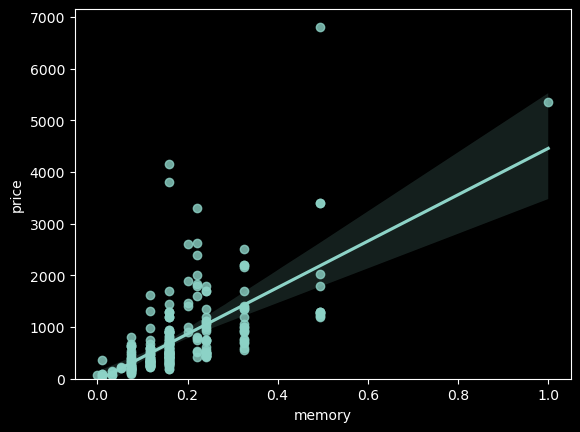

In [381]:

sns.regplot(x = "memory", y = "price", data = dfc)
plt.ylim(0,)